Univariate Groundwater Time Series Analysis and Forecasting with Python

 About Time Series analysis
* Time series analysis comprises methods for analyzing time series data in order to extract meaningful statistics and other characteristics of the data.
* Time series forecasting is the use of a model to predict future values based on previously observed values.

In [1]:
# importing libreries and changing their name

import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib

plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

## The Data

<p>We are using Ground Water Data.</p>

In [2]:
# read the excel file
furniture = pd.read_excel("Budi_data3_sumur_2.xls")
furniture.head()

,Row ID,Order ID,Measurement Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,GWE,Quantity,Discount,Profit
0,1,0,2005-01-01,2005-01-01,Standard Class,0,Departemen Water Resource,Mojave River Basin,United States,Apple Valley,...,92307,Central,Monitoring Well Data,Hydrogeology,Flow Direction,Groundwater Level,2736.4316,1,1,1
1,2,0,2005-02-01,2005-02-01,Standard Class,1,Departemen Water Resource,Mojave River Basin,United States,Apple Valley,...,92307,Central,Monitoring Well Data,Hydrogeology,Flow Direction,Groundwater Level,2736.4872,1,1,1
2,3,0,2005-03-01,2005-03-01,Standard Class,2,Departemen Water Resource,Mojave River Basin,United States,Apple Valley,...,92307,Central,Monitoring Well Data,Hydrogeology,Flow Direction,Groundwater Level,2736.5428,1,1,1
3,4,0,2005-04-01,2005-04-01,Standard Class,3,Departemen Water Resource,Mojave River Basin,United States,Apple Valley,...,92307,Central,Monitoring Well Data,Hydrogeology,Flow Direction,Groundwater Level,2736.5984,1,1,1
4,5,0,2005-05-01,2005-05-01,Standard Class,4,Departemen Water Resource,Mojave River Basin,United States,Apple Valley,...,92307,Central,Monitoring Well Data,Hydrogeology,Flow Direction,Groundwater Level,2736.6540,1,1,1


In [3]:
furniture.describe()

,Row ID,Order ID,Customer ID,Postal Code,GWE,Quantity,Discount,Profit
count,168.000000,168.0,168.000000,168.0,168.000000,168.0,168.0,168.0
mean,84.500000,0.0,83.500000,92307.0,2748.838824,1.0,1.0,1.0
std,48.641546,0.0,48.641546,0.0,9.075699,0.0,0.0,0.0
min,1.000000,0.0,0.000000,92307.0,2736.431600,1.0,1.0,1.0
25%,42.750000,0.0,41.750000,92307.0,2739.105761,1.0,1.0,1.0
50%,84.500000,0.0,83.500000,92307.0,2749.700652,1.0,1.0,1.0
75%,126.250000,0.0,125.250000,92307.0,2757.445417,1.0,1.0,1.0
max,168.000000,0.0,167.000000,92307.0,2762.833750,1.0,1.0,1.0


## Data Preprocessing

In [4]:
# Remove columns which are not required in predictions

cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis = 1, inplace = True)
furniture.head()

,Measurement Date,GWE
0,2005-01-01,2736.4316
1,2005-02-01,2736.4872
2,2005-03-01,2736.5428
3,2005-04-01,2736.5984
4,2005-05-01,2736.6540


In [5]:
# Sort the Order Date 
furniture = furniture.sort_values('Measurement Date')

#print the sorted values
print(furniture.head(1))

#check any missing values
furniture.isnull().sum()

  Measurement Date        GWE
0       2005-01-01  2736.4316


Measurement Date    0
GWE                 0
dtype: int64

In [6]:
# grouping sales according to Order Date
furniture.groupby('Measurement Date')['GWE'].sum().reset_index()

# min and max values of Order Date
print(furniture['Measurement Date'].min())
print(furniture['Measurement Date'].max())

2005-01-01 00:00:00
2018-12-01 00:00:00


In [7]:
#set 'Order Date' as index
furniture = furniture.set_index('Measurement Date')
furniture.index

DatetimeIndex(['2005-01-01', '2005-02-01', '2005-03-01', '2005-04-01',
               '2005-05-01', '2005-06-01', '2005-07-01', '2005-08-01',
               '2005-09-01', '2005-10-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', name='Measurement Date', length=168, freq=None)

In [8]:
# average the daily sales value for each month 
# use start of each month as the timestamp
y = furniture['GWE'].resample('MS').mean()
y['2017':]

Measurement Date
2017-01-01    2760.064167
2017-02-01    2760.184583
2017-03-01    2760.305000
2017-04-01    2760.425417
2017-05-01    2760.545833
2017-06-01    2760.666250
2017-07-01    2760.786667
2017-08-01    2760.907083
2017-09-01    2761.027500
2017-10-01    2761.147917
2017-11-01    2761.268333
2017-12-01    2761.388750
2018-01-01    2761.509167
2018-02-01    2761.629583
2018-03-01    2761.750000
2018-04-01    2761.870417
2018-05-01    2761.990833
2018-06-01    2762.111250
2018-07-01    2762.231667
2018-08-01    2762.352083
2018-09-01    2762.472500
2018-10-01    2762.592917
2018-11-01    2762.713333
2018-12-01    2762.833750
Freq: MS, Name: GWE, dtype: float64

## Data Visualization

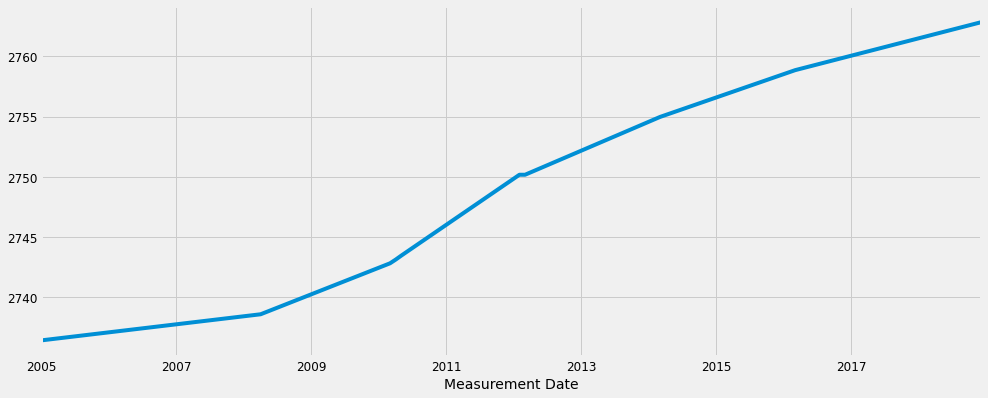

In [9]:
y.plot(figsize = (15, 6))
plt.show()

# Time-series decompositon 
* It allows us to decompose our time series into three distinct components
<ul>
<li>Trend</li>
<li>Seasonality</li>
<li>Noise</li>
</ul>


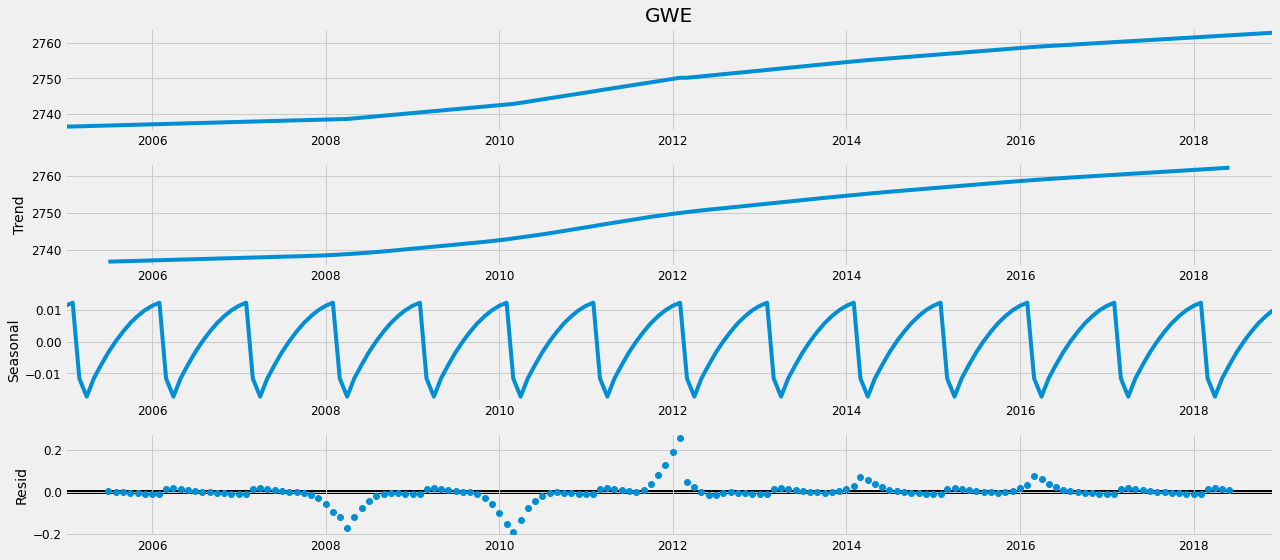

In [10]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(y, model = 'additive')
fig = decomposition.plot()
plt.show()

## Time series forecasting with ARIMA model

<p>
    <b><i>About ARIMA model</i></b>
<ul>
    <li>ARIMA stands for <i>Autoregressive Integreted Moving Average</i></li>
    <li>ARIMA models are denoted with the notation <i>ARIMA(p, d, q)</i></li>
    <li>These three parameters account for <i>seasonality, trend, and noise</i> in data</li>
</ul>
</p>

In [11]:
# set the typical ranges for p, d, q
p = d = q = range(0, 2)

#take all possible combination for p, d and q
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))


Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [12]:
# Using Grid Search find the optimal set of parameters that yields the best performance
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order = param, seasonal_order = param_seasonal, enforce_stationary = False,enforce_invertibility=False) 
            result = mod.fit()   
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, result.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:3139.526943101696
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2951.976024593469
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:684.9730696428046
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:525.1944929385417


D:\ProgramData\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1431.8000950574121
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:330.0199232458522
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:326.2148905192768
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:3019.7644735749673


D:\ProgramData\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:3233.2723733439384
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:476.245345964545
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:317.1532569717666


D:\ProgramData\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1314.1627806823176


D:\ProgramData\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1922.7332514541292
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:121.42167328705078
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:118.77736860197525
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:-99.8493009841357
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:-233.71334133385966
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:-383.10771001897103
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:-382.8389166067048
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:-404.235897592326
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:-403.1928304622018
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:-383.2474289222075
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:-382.3324330211948
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:-276.891168793186
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:-366.2561640768645
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:-452.98160718972883
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:-460.4372318268231
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:-486.859568343855
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:-491.8038721496954
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:-461.8370616

D:\ProgramData\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\ProgramData\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:-76.98306268935288
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:-377.9529679556575


D:\ProgramData\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:-373.03671507783895


D:\ProgramData\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:-323.8867983434411
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:-325.0322068498266
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:-378.10944432050724


D:\ProgramData\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\ProgramData\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:-375.6063603967058
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:-216.638529959327


D:\ProgramData\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:-243.1245560425668
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:-447.81061718150573
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:-404.1631096496525


D:\ProgramData\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:-391.94906930384985


D:\ProgramData\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:-384.50644577077685
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:-456.6760923034272
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:-447.123366314098
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:-663.0522449068121
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:-661.1837513487474
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:-516.7612007782591
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:-588.162536916333
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:-661.1859576483478
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:-659.4996273537133
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:-561.0134059573038
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:-586.1785310790092
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:-685.1979692649984
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:-682.8722606333567
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:-526.0557741062137
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:-607.1313502154183
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:-682.8850316544747
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:-680.8827830896222
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:-576.3578208

###### Fitting the ARIMA model

In [13]:
#Fitting the ARIMA model using above optimal combination of p, d, q (optimal means combination at which we got lowest AIC score)

model = sm.tsa.statespace.SARIMAX(y, order = (1, 1, 1),
                                  seasonal_order = (1, 1, 0, 12)
                                 )
result = model.fit()
print(result.summary().tables[1])


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9462      0.040     23.788      0.000       0.868       1.024
ma.L1         -0.3814      0.089     -4.277      0.000      -0.556      -0.207
ar.S.L12      -0.5222      0.020    -26.183      0.000      -0.561      -0.483
sigma2         0.0013   4.99e-05     26.174      0.000       0.001       0.001


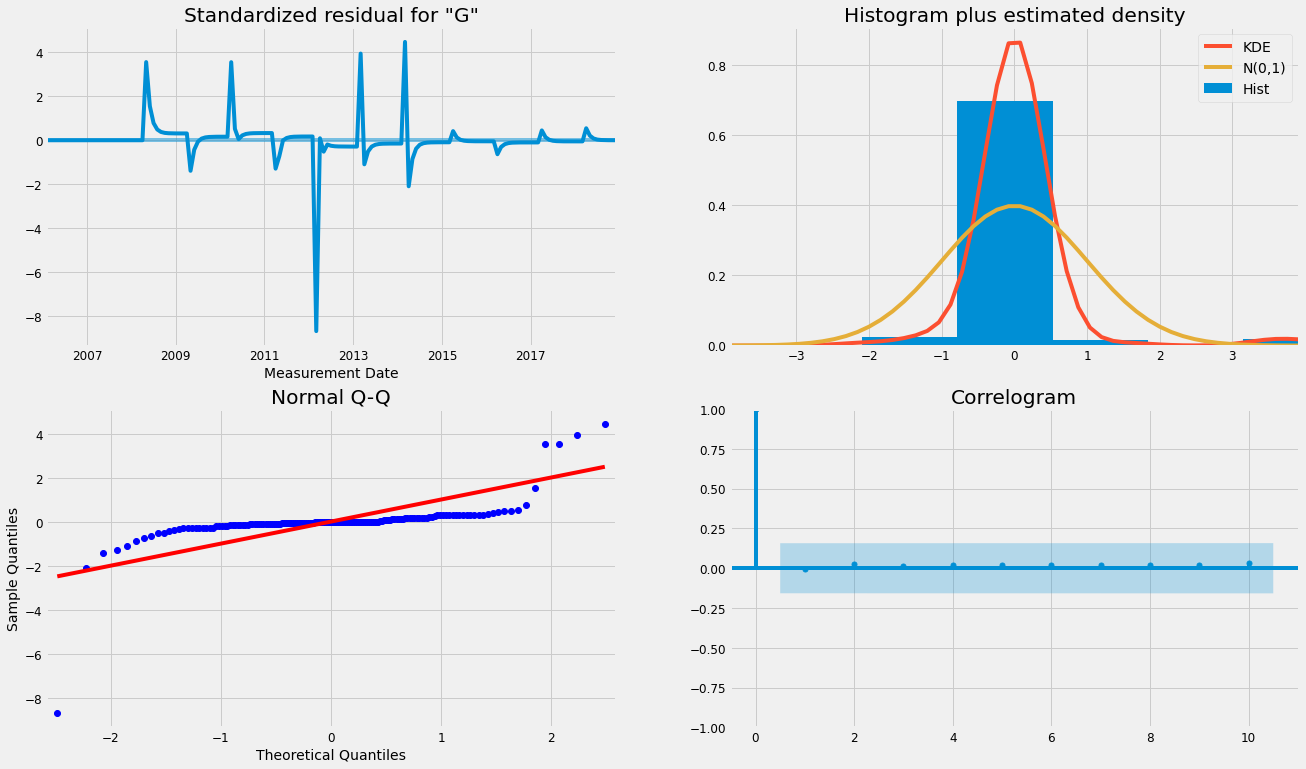

In [14]:
#run model diagnostic to investigate any unusual behavior
result.plot_diagnostics(figsize = (20, 12))
plt.show()

<p>It is not perfect, however, our model diagnostics suggests that the model residuals are near normally distributed.</p>

###### Validating Forecasts

<p>
To help us understand the accuracy of our forecasts, we compare predicted GWE to real GWE of the time series, and we set forecasts to start at <i>2017–01–01</i> to <i>the end of the data.</i>
</p>

In [15]:
prediction = result.get_prediction(start = pd.to_datetime('2013-01-01'), dynamic = False)
prediction_ci = prediction.conf_int()
prediction_ci

,lower GWE,upper GWE
Measurement Date,,
2013-01-01,2752.119523,2752.261255
2013-02-01,2752.319525,2752.461258
2013-03-01,2752.366831,2752.508564
2013-04-01,2752.748638,2752.890371
2013-05-01,2752.927559,2753.069292
...,...,...
2018-08-01,2762.280801,2762.422533
2018-09-01,2762.401475,2762.543208
2018-10-01,2762.521990,2762.663723


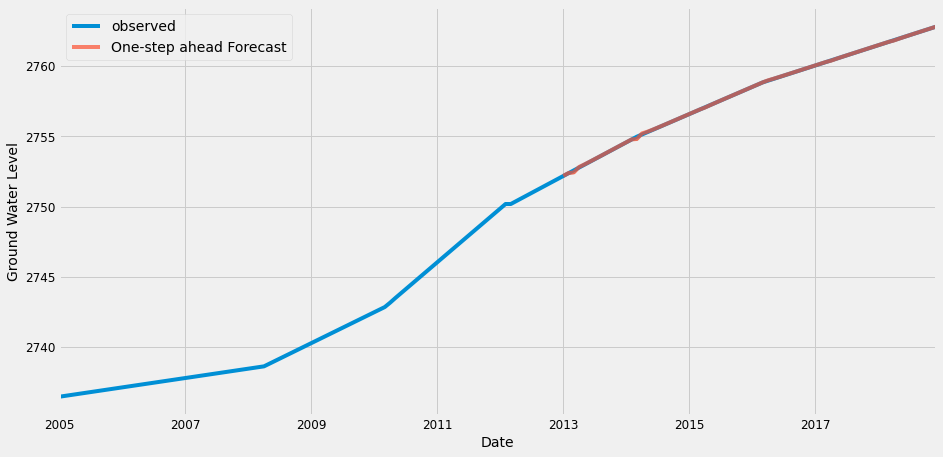

In [16]:
#Visualize the forecasting
ax = y['2005':].plot(label = 'observed')
prediction.predicted_mean.plot(ax = ax, label = 'One-step ahead Forecast', alpha = 0.7, figsize = (14, 7))
ax.fill_between(prediction_ci.index, prediction_ci.iloc[:, 0], prediction_ci.iloc[:, 1], color = 'k', alpha = 0.2)
ax.set_xlabel("Date")
ax.set_ylabel('Ground Water Level')
plt.legend()
plt.show()

<p>The line plot is showing the observed values compared to the rolling forecast predictions. Overall, our forecasts align with the true values very well, showing an upward trend starts from the beginning of the year and captured the seasonality toward the end of the year.
</p>

###### Error Analysis

In [17]:
# Evaluation metrics are Squared Mean Error(SME) and Root Mean Squared Error(RMSE)
y_hat = prediction.predicted_mean
y_truth = y['2013-01-01':]

mse = ((y_hat - y_truth) ** 2).mean()
rmse = np.sqrt(mse)
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 4)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 4)))


The Mean Squared Error of our forecasts is 0.0008
The Root Mean Squared Error of our forecasts is 0.0283


##### Producing and visualizing forecasts

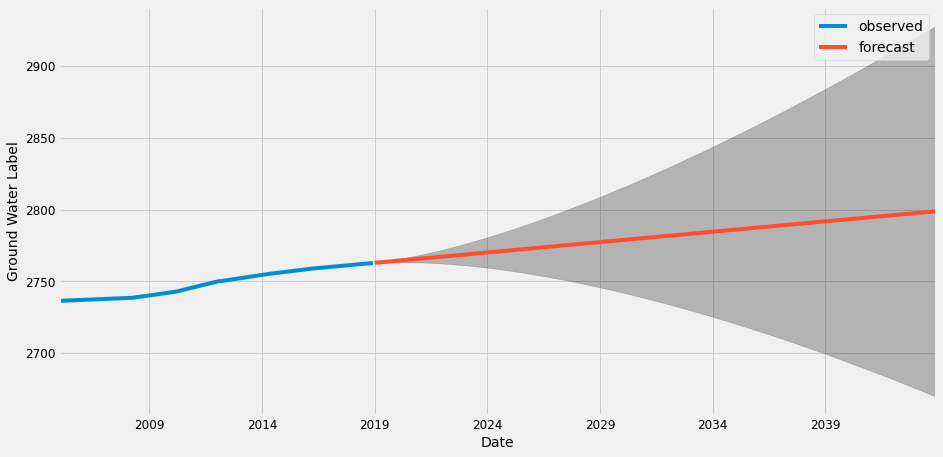

In [18]:
# forcasting for out of sample data
pred_uc = result.get_forecast(steps = 300)
pred_ci = pred_uc.conf_int()

ax = y.plot(label = 'observed', figsize = (14, 7))
pred_uc.predicted_mean.plot(ax = ax, label = 'forecast')
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color = 'k', alpha = 0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Ground Water Label')

plt.legend()
plt.show()


## Summary

<ul>
<li>Our model clearly captured Ground Water seasonality.</li>
<li>As we forecast further out into the future, it is natural for us to become less confident in our values.</li>
<li>This is reflected by the confidence intervals generated by our model, which grow larger as we move further out into the future.</li>

</ul>

In [19]:
pred_uc.predicted_mean['2040'].describe()

count      12.000000
mean     2793.960601
std         0.434157
min      2793.298329
25%      2793.629464
50%      2793.960600
75%      2794.291737
max      2794.622876
Name: predicted_mean, dtype: float64

In [20]:
df = pd.DataFrame(pred_uc.predicted_mean['2040'])
display(df)

,predicted_mean
2040-01-01,2793.298329
2040-02-01,2793.418742
2040-03-01,2793.539154
2040-04-01,2793.659567
2040-05-01,2793.779980
2040-06-01,2793.900393
2040-07-01,2794.020807
2040-08-01,2794.141220
2040-09-01,2794.261634
2040-10-01,2794.382048
